Importing the dependencies

In [366]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [367]:
#loading the data from csv file
car_dataset = pd.read_csv('/content/Car details v3.csv')

In [368]:
#to see the first 5 rows of the datafram
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [369]:
#checking the no.of rows and columns
car_dataset.shape

(8128, 13)

In [370]:
#getting some info about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [371]:
#checking missing values
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [372]:
# checking the distribution of categorical data
print(car_dataset.fuel.value_counts())
print(car_dataset.seller_type.value_counts())
print(car_dataset.transmission.value_counts())
print(car_dataset.owner.value_counts())

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64
seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64
transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64
owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64


Encoding

In [373]:
# encoding 'fuel' Column
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

# encoding 'seller_type' Column
car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)

# encoding 'transmission' Column
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

#encoding 'owner' column
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

/tmp/ipython-input-3366068390.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
/tmp/ipython-input-3366068390.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)
/tmp/ipython-input-3366068390.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitl

In [374]:
# Remove units and convert to float
car_dataset['mileage'] = car_dataset['mileage'].str.extract(r'([\d\.]+)').astype(float)
car_dataset['engine'] = car_dataset['engine'].str.extract(r'([\d\.]+)').astype(float)
car_dataset['max_power'] = car_dataset['max_power'].str.extract(r'([\d\.]+)').astype(float)

# Torque is tricky: just take the first number
car_dataset['torque'] = car_dataset['torque'].str.extract(r'([\d\.]+)').astype(float)

In [375]:
# Check cleaned dataset
print(car_dataset.head())
print(car_dataset.dtypes)

                           name  year  selling_price  km_driven  fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500     1   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000     1   
2      Honda City 2017-2020 EXi  2006         158000     140000     0   
3     Hyundai i20 Sportz Diesel  2010         225000     127000     1   
4        Maruti Swift VXI BSIII  2007         130000     120000     0   

   seller_type  transmission  owner  mileage  engine  max_power  torque  seats  
0            1             0      0    23.40  1248.0      74.00   190.0    5.0  
1            1             0      1    21.14  1498.0     103.52   250.0    5.0  
2            1             0      2    17.70  1497.0      78.00    12.7    5.0  
3            1             0      0    23.00  1396.0      90.00    22.4    5.0  
4            1             0      0    16.10  1298.0      88.20    11.5    5.0  
name              object
year               int64
selling_price      int64


In [376]:
car_dataset['mileage'].fillna(car_dataset['mileage'].median(), inplace=True)
car_dataset['engine'].fillna(car_dataset['engine'].median(), inplace=True)
car_dataset['max_power'].fillna(car_dataset['max_power'].median(), inplace=True)
car_dataset['torque'].fillna(car_dataset['torque'].median(), inplace=True)
car_dataset['seats'].fillna(car_dataset['seats'].mode()[0], inplace=True)


/tmp/ipython-input-2501289297.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_dataset['mileage'].fillna(car_dataset['mileage'].median(), inplace=True)
/tmp/ipython-input-2501289297.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

In [377]:
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


In [378]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,0,0,23.40,1248.0,74.00,190.0,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,0,1,21.14,1498.0,103.52,250.0,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,1,0,2,17.70,1497.0,78.00,12.7,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,0,0,23.00,1396.0,90.00,22.4,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,1,0,0,16.10,1298.0,88.20,11.5,5.0


Spliting the data and target

In [379]:
X = car_dataset.drop(['name','selling_price'],axis=1)
Y = car_dataset['selling_price']

In [380]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner  mileage  \
0     2014     145500     1            1             0      0    23.40   
1     2014     120000     1            1             0      1    21.14   
2     2006     140000     0            1             0      2    17.70   
3     2010     127000     1            1             0      0    23.00   
4     2007     120000     0            1             0      0    16.10   
...    ...        ...   ...          ...           ...    ...      ...   
8123  2013     110000     0            1             0      0    18.50   
8124  2007     119000     1            1             0      3    16.80   
8125  2009     120000     1            1             0      0    19.30   
8126  2013      25000     1            1             0      0    23.57   
8127  2013      25000     1            1             0      0    23.57   

      engine  max_power  torque  seats  
0     1248.0      74.00   190.0    5.0  
1     1498.0     103.52   250

In [381]:
print(Y)

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64


Train Test Split

In [382]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

Model Training

In [383]:
#loading the linear regression model
lin_reg_model = LinearRegression()

In [384]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation
1. Linear
2. Lasso
3. Random Forest

Linear Model

In [385]:
#prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [386]:
# R squared Error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.6785764195131136


Visualize the actual and predicted prices

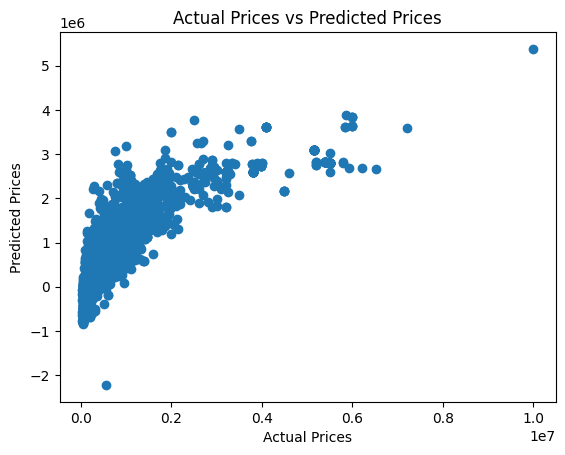

In [387]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [388]:
#prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [389]:
# R squared Error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.6951265329583274


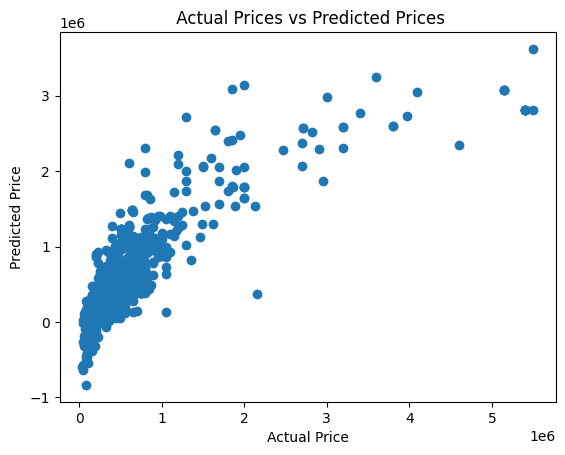

In [390]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Lasso Model

In [391]:
# loading the lasso regression model
lass_reg_model = Lasso()

In [392]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [393]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [394]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6785764194680439


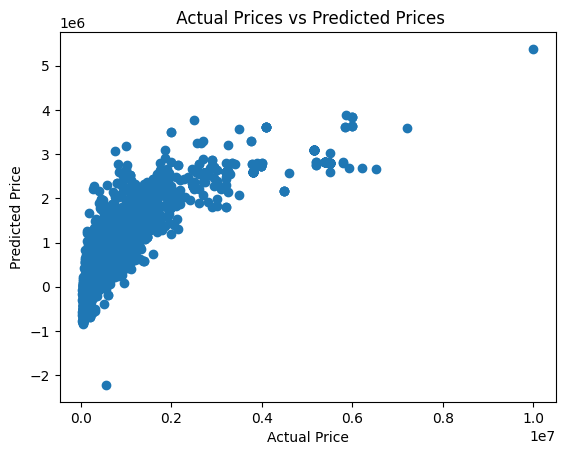

In [395]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [396]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [397]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.6951265230219964


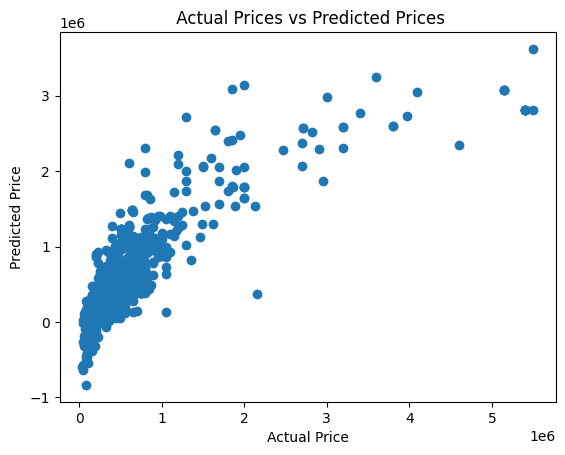

In [398]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

Random Forst Regressor Model

In [399]:
rf_model = RandomForestRegressor(
    n_estimators=200,        # number of trees
    max_depth=15,           # tree depth control
    min_samples_split=5,    # regularization
    random_state=42,
    n_jobs=-1
)

In [400]:
rf_model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=15, min_samples_split=5, n_estimators=200,
                      n_jobs=-1, random_state=42)

In [401]:
train_preds = rf_model.predict(X_train)
test_preds = rf_model.predict(X_test)

In [402]:
print("Training R²:", r2_score(Y_train, train_preds))
print("Testing R²:", r2_score(Y_test, test_preds))

Training R²: 0.992542612231732
Testing R²: 0.9581193237944144


Why use Random Forest Regressor?
1. Captures non-linear relationships
2. Handles feature interactions automatically
3. No need to normalize/scale like linear models